# **Tarea Nº 3**

Curso:          Fundamentos de Programación en Python para las CCSS y la Gestión Pública

Profesor:       Víctor Fuentes Campos     

- Fecha y hora de entrega: Martes 17 de diciembre, 5:59pm
- Agregue los nombres de las personas con las que discutió esta tarea: ____ Armando Paredes ______
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom 

## **Mercado de autos usados**

Importa el conjunto de datos `neoauto_20240924.csv`
    

1. ¿Cuáles son las cinco marcas de autos de segunda mano con mayor número de publicaciones? Use `item_brand`

In [5]:

import pandas as pd
ruta_archivo = r"C:\Users\usuario\Documents\Python Scripts\ccss-gp-2024\qlab-intro-python-ccss-tarea-3-tarea_plantilla\neoauto_20240924.csv"

df = pd.read_csv(ruta_archivo)

print(df.head())



   value  item_id  item_price               item_name item_category  \
0  29200  1807331     29200.0       toyota hilux 2021         autos   
1  98500  1807393     98500.0       lexus lx 600 2023         autos   
2  16800  1739308     17800.0          bmw 520-i 2016         autos   
3  15900  1805714     16900.0  chevrolet captiva 2021         autos   
4  12500  1806332     12500.0     dfsk glory 500 2023         autos   

  item_category_2 item_brand  item_km  item_year        item_transmission  \
0         Pick Up     TOYOTA  51635.0       2021                 Mecánica   
1  Camionetas Suv      LEXUS  15000.0       2023  Automática - Secuencial   
2           Sedan        BMW  66000.0       2016  Automática - Secuencial   
3  Camionetas Suv  CHEVROLET  40300.0       2021  Automática - Secuencial   
4  Camionetas Suv       DFSK  33000.0       2023                 Mecánica   

   ... item_location_province    item_tag               item_advertiser  \
0  ...                   lima  Como

In [2]:
#solución
df= pd.read_csv(ruta_archivo)
top_marcas =df['item_brand'].value_counts().head(5)
print("Las cinco marcas con mayor publicaciones")
print(top_marcas)

Las cinco marcas con mayor publicaciones
item_brand
BMW              349
TOYOTA           338
NISSAN           285
MERCEDES BENZ    243
MAZDA            238
Name: count, dtype: int64


2. ¿Cuántas camionetas SUV tienen un precio mayor a US$20,000? Use `item_category_2`

In [3]:
# Solución

mas20k = df[(df['item_category_2'] == 'Camionetas Suv') & (df['item_price'] > 20000)]

cantidad=len(mas20k)
print(f"El número de camionetas SUV con un precio mayor a US$20,000 es : {cantidad}")



El número de camionetas SUV con un precio mayor a US$20,000 es : 1153


3. ¿Cuántos tipos de transmisiones existen y cuántas publicaciones contiene cada uno? Use `item_transmission` y `item_price`

In [4]:
# Solución

transmisiones= df.groupby('item_transmission').agg(cantidad_publicaciones=('item_price','count')).reset_index()
print("Cantidad de transmisionesy publicaciones ")
print(transmisiones)


Cantidad de transmisionesy publicaciones 
         item_transmission  cantidad_publicaciones
0               Automática                    1289
1  Automática - Secuencial                    1731
2                 Mecánica                    1021


4. Encuentra los 5 autos de mayor precio (`item_price`) para cada tipo de publicación (`item_publication_type`) 

In [5]:
# Solución

df['item_price']=pd.to_numeric(df['item_price'],errors='coerce')

autoscaros=df.groupby('item_publication_type', group_keys=False).apply(lambda x: x.nlargest (5, 'item_price'))
print(autoscaros[['item_publication_type', 'item_name']])

     item_publication_type                                     item_name
1769             DESTACADO                               bmw x7 40i 2024
1773             DESTACADO                        porsche cayenne s 2020
1707             DESTACADO                                  audi q8 2022
1772             DESTACADO          mercedes benz amg a 45s 4 matic 2022
1639             DESTACADO                            nissan patrol 2024
3582              GRATUITO                             toyota hilux 2019
3766              GRATUITO              mercedes benz gle 450 coupe 2023
3749              GRATUITO             mercedes benz gls 400 4matic 2018
3587              GRATUITO                                bmw m240i 2023
3743              GRATUITO                          toyota fortuner 2022
1010               PREMIUM  mercedes benz gle 63 s amg 4matic coupe 2023
1058               PREMIUM                        rolls royce ghost 2014
1023               PREMIUM                    merce

5. ¿Cuál es el kilometraje promedio (`item_km`) de las 50 publicaciones con mayor precio (`item_price`) que ofrecen financiamiento de un banco (`item_financed_by`)?

In [6]:
# Solución
financia = df[df['item_financed_by'].notna()]

top50 = financia.nlargest(50, 'item_price')

kilometraje_promedio = top50['item_km'].mean()

print(f"El kilometraje promedio de las 50 publicaciones con mayor precio que ofrecen financiamiento bancario es: {kilometraje_promedio} km")

El kilometraje promedio de las 50 publicaciones con mayor precio que ofrecen financiamiento bancario es: 21695.52 km


6. Encuentra los 5 autos de menos kilometraje (`item_km`) para cada una de las 3 categorías de venta (`item_tag`) con mayores publicaciones

In [9]:
# Solución
categorias_mas_comunes = df['item_tag'].value_counts().head(3).index

df_top_categorias = df[df['item_tag'].isin(categorias_mas_comunes)]

autos_menos_kilometraje = df_top_categorias.groupby('item_tag', group_keys=False).apply(
    lambda x: x.nsmallest(5, 'item_km'))

print(autos_menos_kilometraje[['item_tag', 'item_name', 'item_km', 'item_price']])

         item_tag                item_name  item_km  item_price
505       Premium         hyundai h-1 2002      0.0      6650.0
675       Premium     subaru forester 2014      0.0     14500.0
1235      Premium        toyota hilux 2019      0.0     23900.0
1283      Premium       chery tiggo 3 2016      0.0      9200.0
1450      Premium       nissan sentra 2022      0.0     16800.0
204     Seminuevo            mg mg gs 2020      0.0     13900.0
377     Seminuevo      nissan qashqai 2024      0.0     30500.0
389     Seminuevo        kia sportage 2017      0.0     17900.0
392     Seminuevo        nissan kicks 2019      0.0     17900.0
393     Seminuevo         mazda cx-30 2024      0.0     27900.0
436   Unico Dueño  volkswagen touareg 2012      0.0     14900.0
1358  Unico Dueño           dodge 250 2018      0.0     14000.0
1376  Unico Dueño          bmw x3 20i 2021      0.0     39800.0
1434  Unico Dueño             audi q7 2018      0.0     35000.0
1448  Unico Dueño        toyota hilux 20

7. Utilizando un `for` loop, encuentre el kilometraje máximo para las publicaciones de las siguientes marcas `["TOYOTA", "SUZUKI","HYUNDAI", "KIA"]`

In [8]:
# Solución
import pyreadstat
import pandas as pd

marcas = ["TOYOTA", "SUZUKI", "HYUNDAI", "KIA"]

for marca in marcas:
   
    df_marca = df[(df['item_brand'] == marca) & (df['item_km'] > 0)]

    if not df_marca.empty:
        km_maximo = df_marca['item_km'].max()
        print(f"El kilometraje máximo para {marca} es: {km_maximo}")
    else:
        print(f"No hay datos disponibles para {marca} con kilometraje mayor a 0.")






El kilometraje máximo para TOYOTA es: 639290.0
El kilometraje máximo para SUZUKI es: 840000.0
El kilometraje máximo para HYUNDAI es: 263000.0
El kilometraje máximo para KIA es: 252273.0


8. Genere un scatterplot que muestre la relación entre precio (`item_price`) y kilometraje (`item_km`)

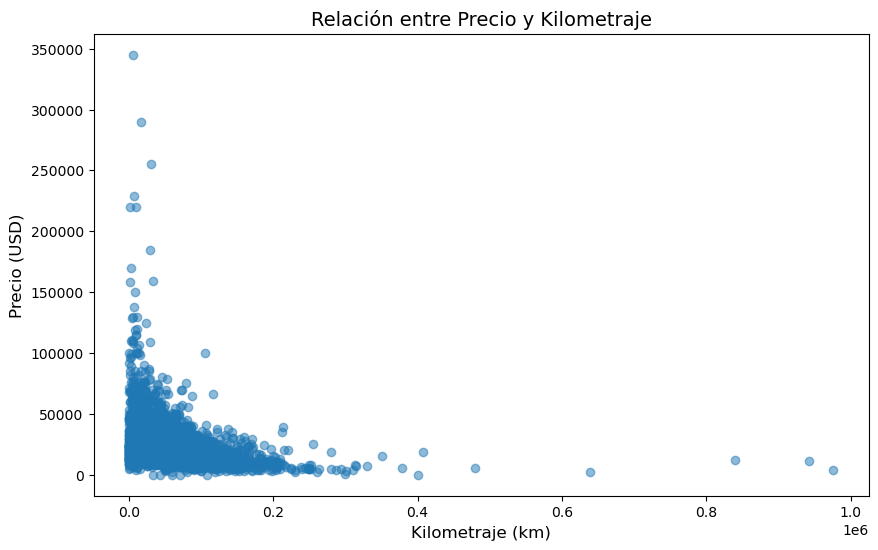

In [9]:
# Solución
import matplotlib.pyplot as plt

df_filtrado = df[(df['item_price'] > 0) & (df['item_km'] > 0)]


plt.figure(figsize=(10, 6))
plt.scatter(df_filtrado['item_km'], df_filtrado['item_price'], alpha=0.5)



plt.title('Relación entre Precio y Kilometraje', fontsize=14)
plt.xlabel('Kilometraje (km)', fontsize=12)
plt.ylabel('Precio (USD)', fontsize=12)



plt.show()


9. Genere un gráfico de barras con el precio promedio para cada marca. Use `item_price` y `item_brand`

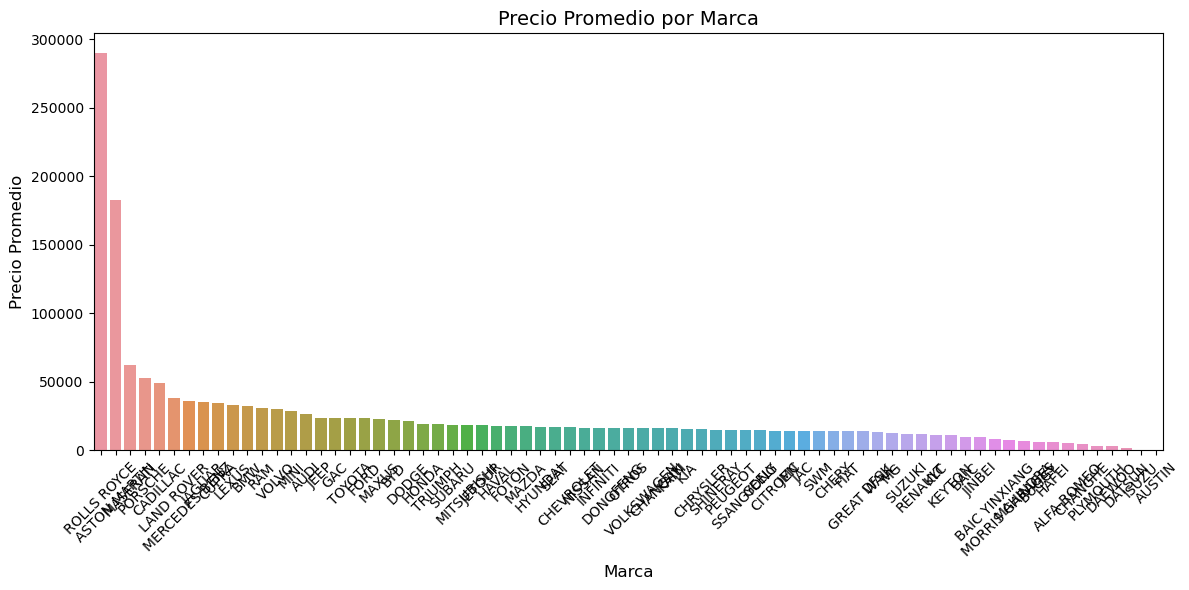

In [16]:
# Solución

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

precio_promedio = df.groupby('item_brand')['item_price'].mean().reset_index()

precio_promedio = precio_promedio.sort_values(by='item_price', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='item_brand', y='item_price', data=precio_promedio)
plt.title('Precio Promedio por Marca', fontsize=14)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Precio Promedio', fontsize=12)
plt.xticks(rotation=45)  
plt.tight_layout()  

plt.show()


10. Genere dos histogramas para las distribuciones del precio (`item_price`) y el kilometraje (`item_km`)

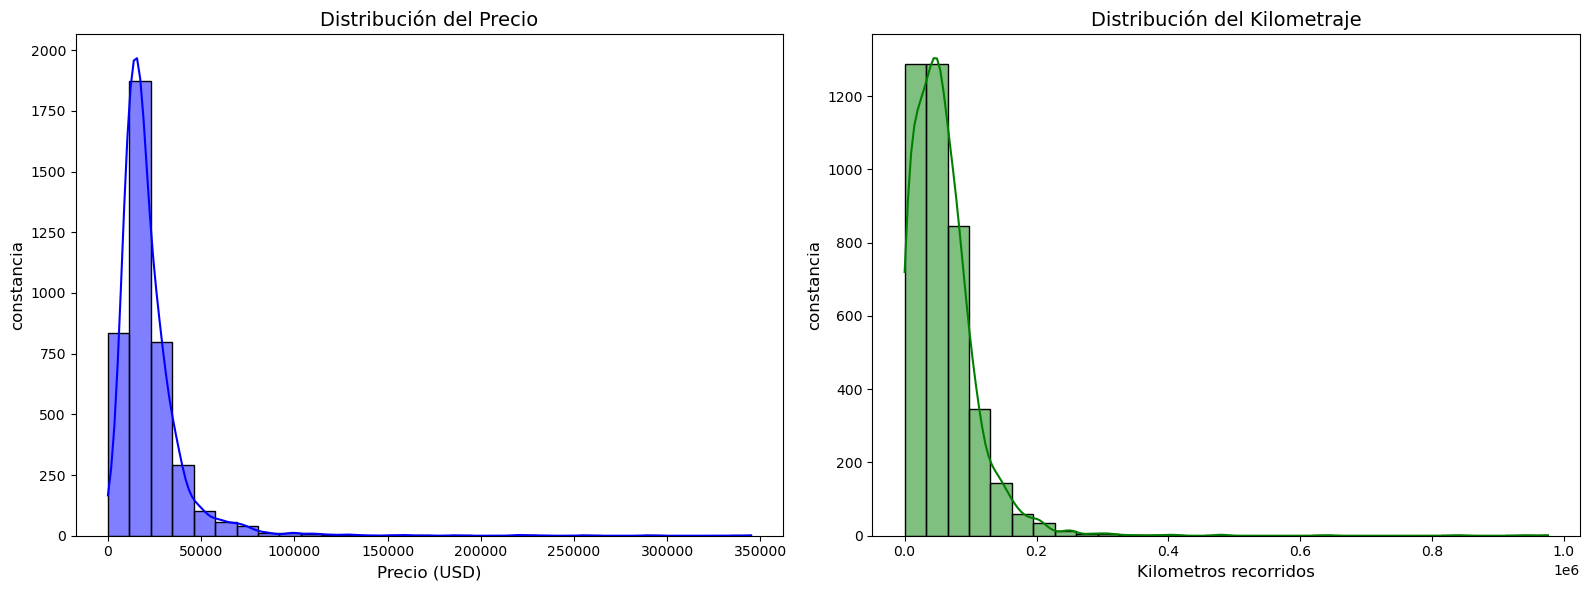

In [20]:

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)  
sns.histplot(data=df, x='item_price', bins=30, kde=True, color='blue')
plt.title('Distribución del Precio', fontsize=14)
plt.xlabel('Precio (USD)', fontsize=12)
plt.ylabel('constancia', fontsize=12)

plt.subplot(1, 2, 2)  
sns.histplot(data=df, x='item_km', bins=30, kde=True, color='green')
plt.title('Distribución del Kilometraje', fontsize=14)
plt.xlabel('Kilometros recorridos', fontsize=12)
plt.ylabel('constancia', fontsize=12)

plt.tight_layout()

plt.show()

## **Gastos del hogar**

Descargue el módulo Sumaria de la Enaho 2023. Para ello, utilice la página de [microdatos del INEI](https://proyectos.inei.gob.pe/microdatos/).

>Ojo: debe utilizar la encuesta `ENAHO Metología ACTUALIZADA` del tipo `Condiciones de Vida y Pobreza - ENAHO` y período `Anual - (Ene-Dic)`

1. Genere un gráfico de barras con el gasto promedio anual por hogar según dominio geográfico? Use `gashog2d` y `dominio`. Para esta pregunta no consideraremos el factor de expansión (`factor07`)

In [ ]:
# Solución

2. Genere un gráfico de barras con el gasto promedio anual por **persona** según dominio geográfico? Use `gashog2d`, `mieperho` y `dominio`. Para esta pregunta no consideraremos el factor de expansión (`factor07`)

In [ ]:
# Solución

3. Para cada categoría de la variable (`pobreza`), calcule el ingreso total per cápita del hogar (`inghog2d`). Use `inghog2d`, `mieperho` y `pobreza`. Para esta pregunta no consideraremos el factor de expansión (`factor07`)

In [ ]:
# Solución

4. Calcule el ahorro promedio de los hogares definido como la diferencia entre el ingreso del hogar (`inghog2d`) y el gasto del hogar (`gashog2d`) y guárdelo en `ahorro`. Luego, grafique el promedio del `ahorro` para cada categoría de la variable (`pobreza`). Use `inghog2d`, `mieperho` y `pobreza`. Para esta pregunta no consideraremos el factor de expansión (`factor07`)

In [ ]:
# Solución